## Explainability Local Metrics for Binary Classification and Regression


#### Imports

In [1]:
import sys
sys.path.append("../../")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

from holisticai.datasets import load_adult

# data and simple preprocessing
dataset = load_adult()['frame']
X = pd.get_dummies(dataset.drop(columns=['class']), drop_first=True)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns=X.columns)

y_clf = pd.DataFrame(dataset['class'].apply(lambda x: 1 if x == '>50K' else 0))
y_reg = pd.DataFrame(dataset['fnlwgt'])
y_reg = scaler.fit_transform(y_reg)

# instantiate and fit models

# regression
reg = LinearRegression()
reg.fit(X_standard, y_reg)

# classification
clf = LogisticRegression(random_state=42, max_iter=100)
clf.fit(X_standard, y_clf)

# import Explainer
from holisticai.explainability import Explainer

### Local Metrics

In [2]:
# instantiate explainer lime classification
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='lime', 
                      model_type='binary_classification', 
                      model=clf, 
                      x=X_standard, 
                      y=y_clf)

In [3]:
explainer.metrics(top_k=0.7)

,Value,Reference
Dataset Spread Stability,0.002832,0
Dataset Spread Mean,0.995311,0
Dataset Spread Ratio,0.999276,0
Features Spread Stability,0.350729,0
Features Spread Mean,0.104494,0
Features Spread Ratio,0.923333,0


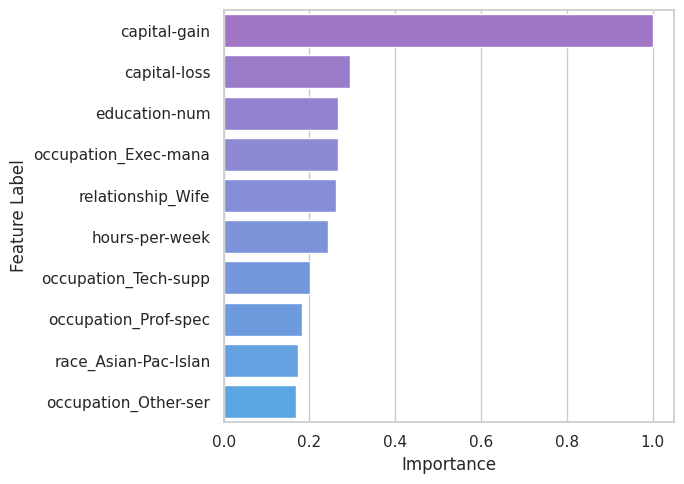

In [4]:
explainer.bar_plot(max_display=10)

In [5]:
# instantiate explainer lime regression
explainer = Explainer(based_on='feature_importance', 
                      strategy_type='lime', 
                      model_type='regression', 
                      model=clf, 
                      x=X_standard, 
                      y=y_reg)

In [6]:
explainer.metrics(top_k=0.3)

,Value,Reference
Dataset Spread Stability,0.003585,0
Dataset Spread Mean,0.932588,0
Dataset Spread Ratio,0.999093,0
Features Spread Stability,0.268689,0
Features Spread Mean,0.116891,0
Features Spread Ratio,0.941267,0


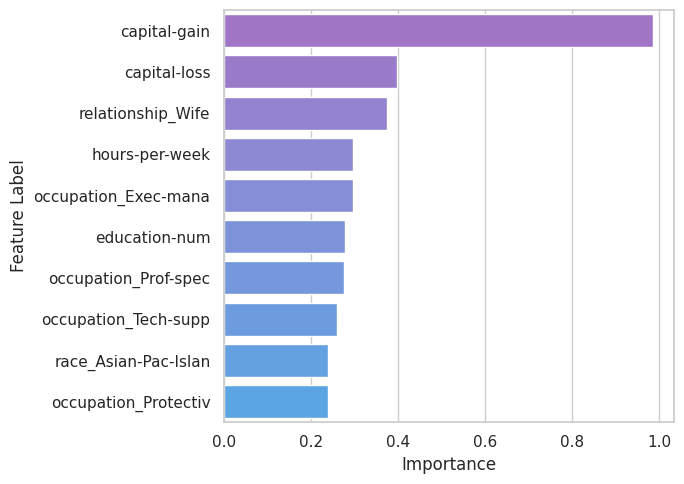

In [7]:
explainer.bar_plot(max_display=10)

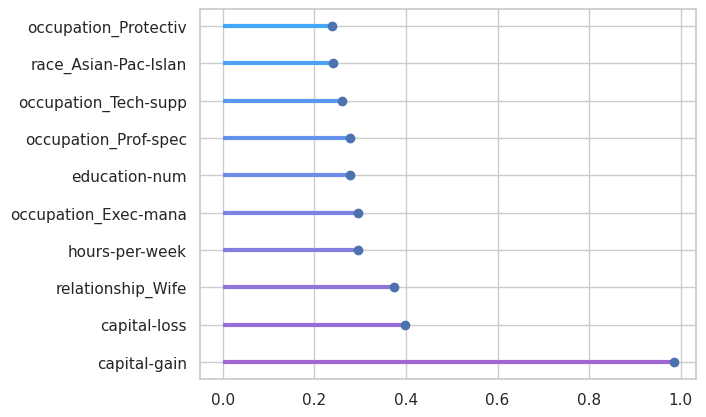

In [8]:
explainer.lolipop_plot(max_display=10)